<a href="https://colab.research.google.com/github/ECV21/Course-Data-Analysis-with-Python-FreeCodeCamp/blob/main/Real_example_FreeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real example

#1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Importing Bitcoin and Ether data:

In [4]:
dataframe= pd.read_csv( 'btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

dataframe.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


# 3. Visualization

<Axes: xlabel='Timestamp'>

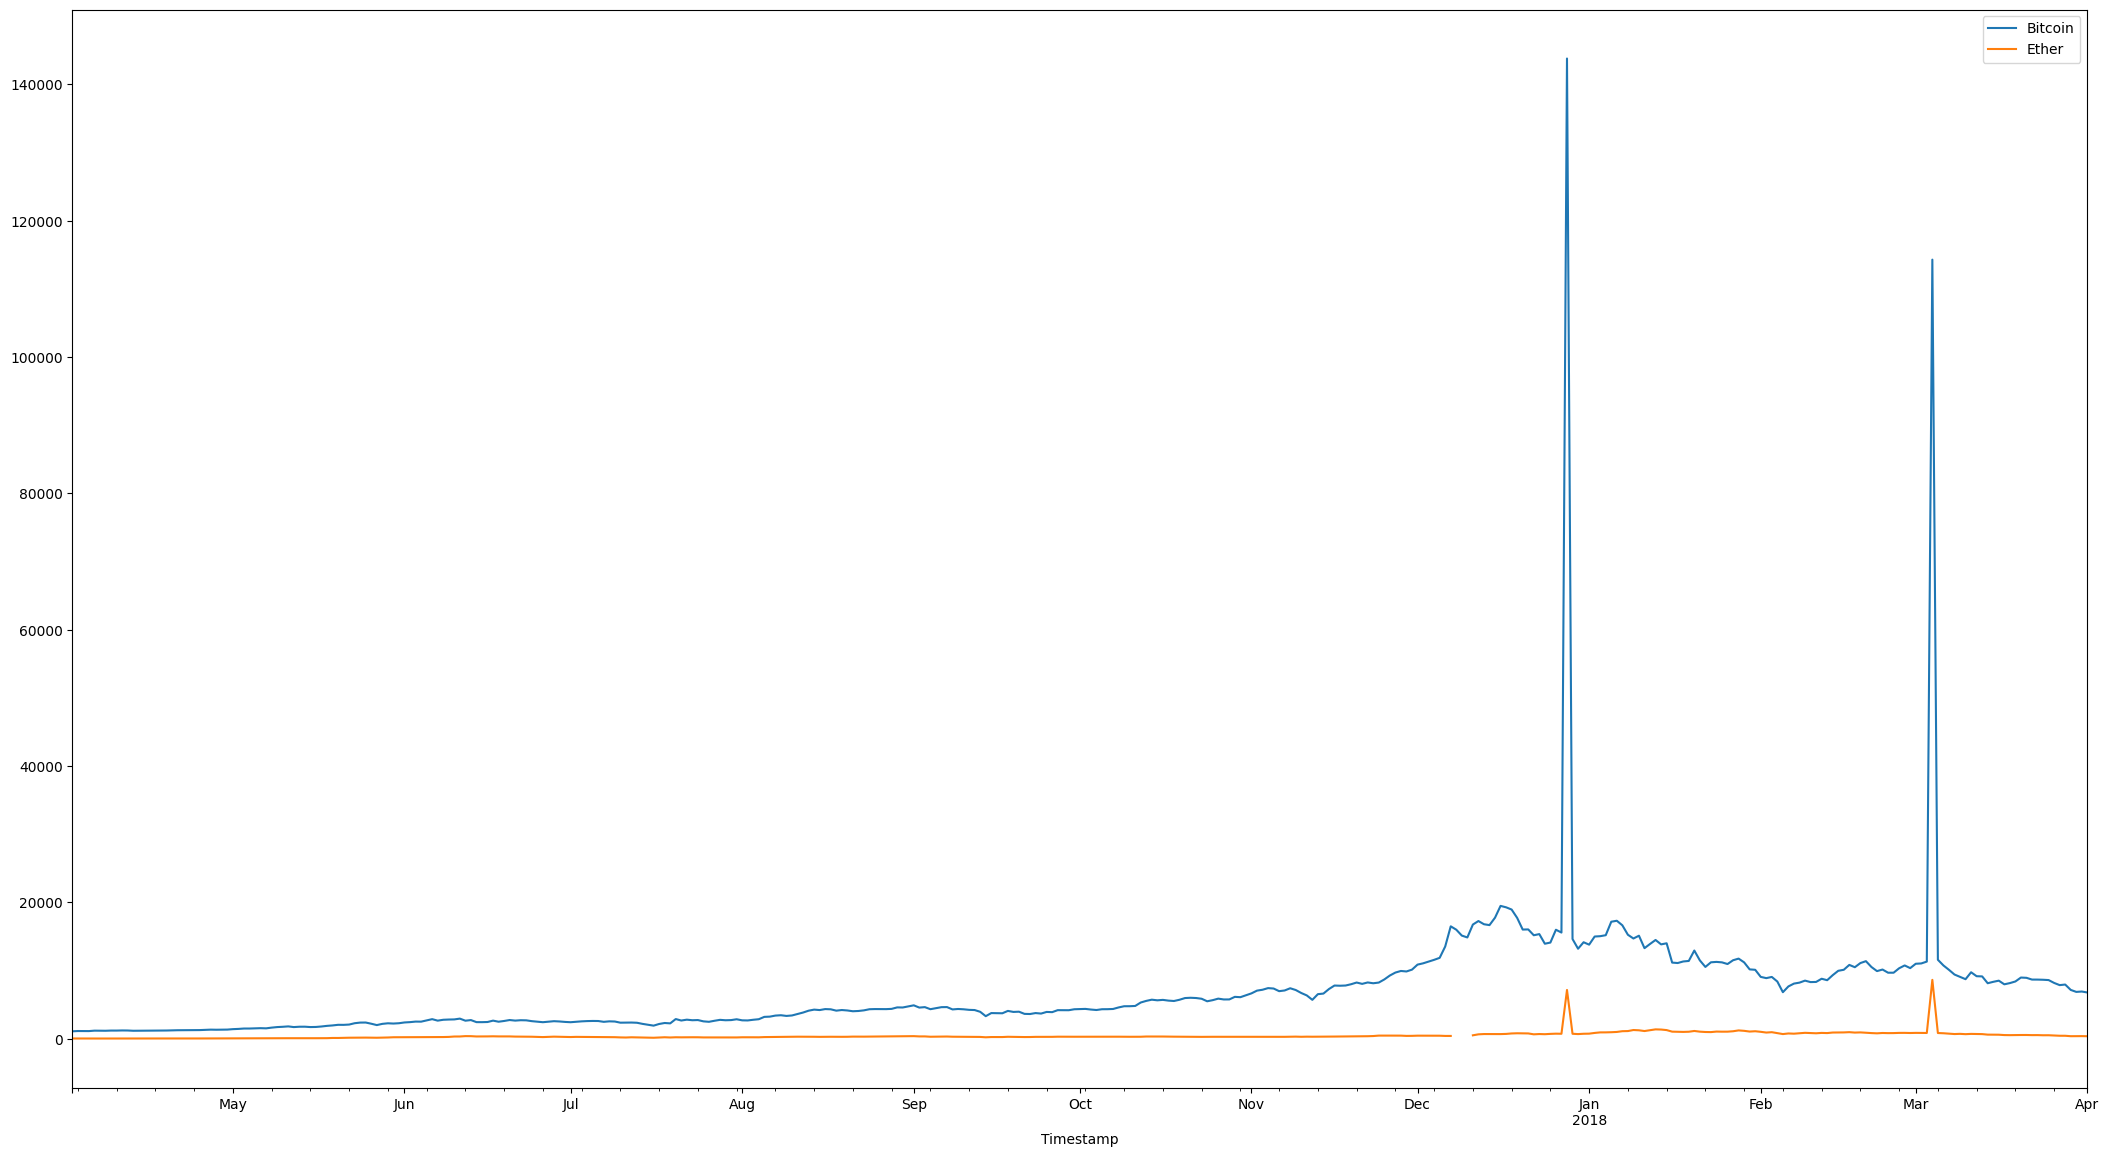

In [6]:
dataframe.plot(figsize=(26, 14))

As we can see there are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and January 2028:

<Axes: title={'center': 'Ether price'}, xlabel='Timestamp'>

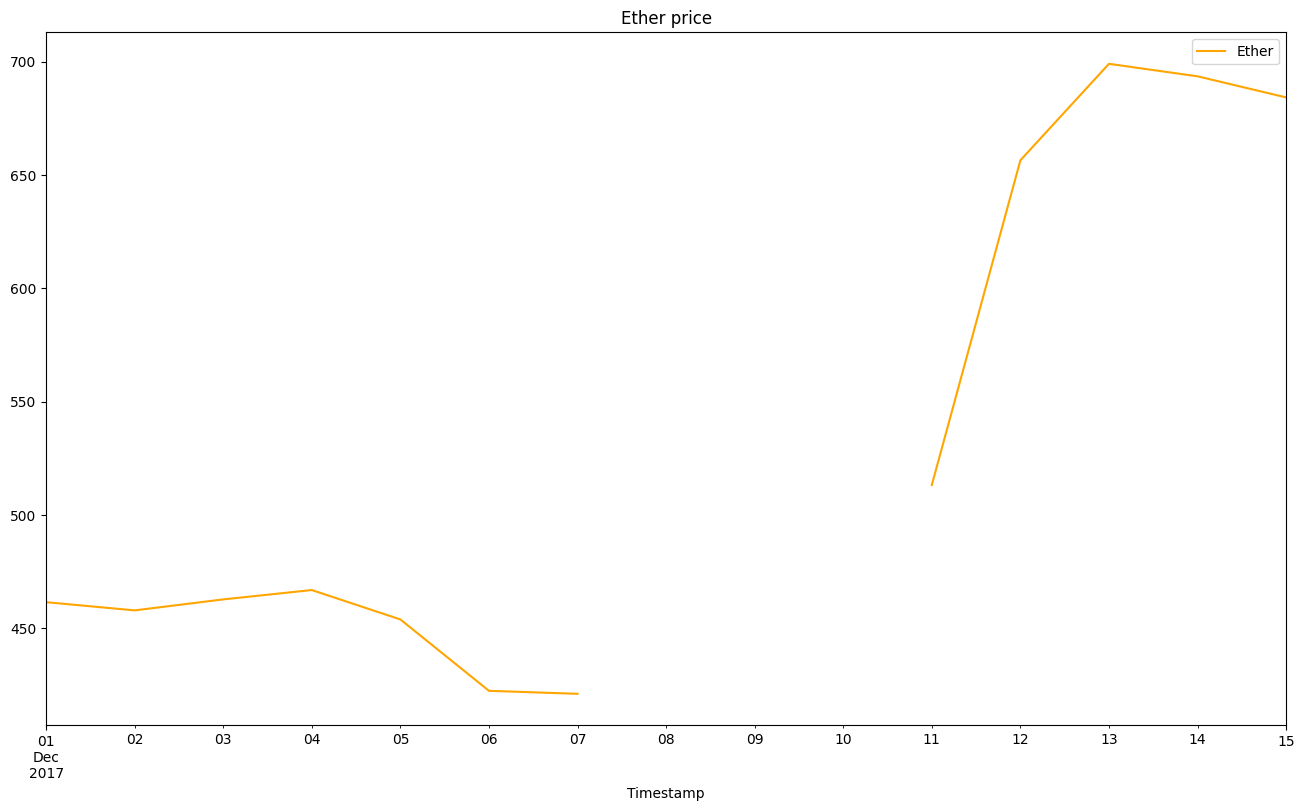

In [12]:
dataframe.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9), title='Ether price', color='orange')


In [15]:
#select a subset of dataframe, we can see NAN values
dataframe_na = dataframe.loc['2017-12': '2017-12-15']
dataframe_na

,Bitcoin,Ether
Timestamp,,
2017-12-01,10883.912000,461.58
2017-12-02,11071.368333,457.96
2017-12-03,11332.622000,462.81
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN


In [17]:
#Are those null values?
#Verificar si hay valores NaN en la columna Ether del dataframe
dataframe_na['Ether'].isna().values.any()

True

In [18]:
#When? what periods of time?

dataframe_na.loc[dataframe_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [19]:
#We now need to decide what we'll do with the missing values. Drop them? Fill them?
# If we decide to fill them, what will be use as fill value?


#For example: we can use the previous value and just assume the price stayed the same:
dataframe.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [20]:

dataframe.fillna(method='bfill', inplace=True)

<Axes: xlabel='Timestamp'>

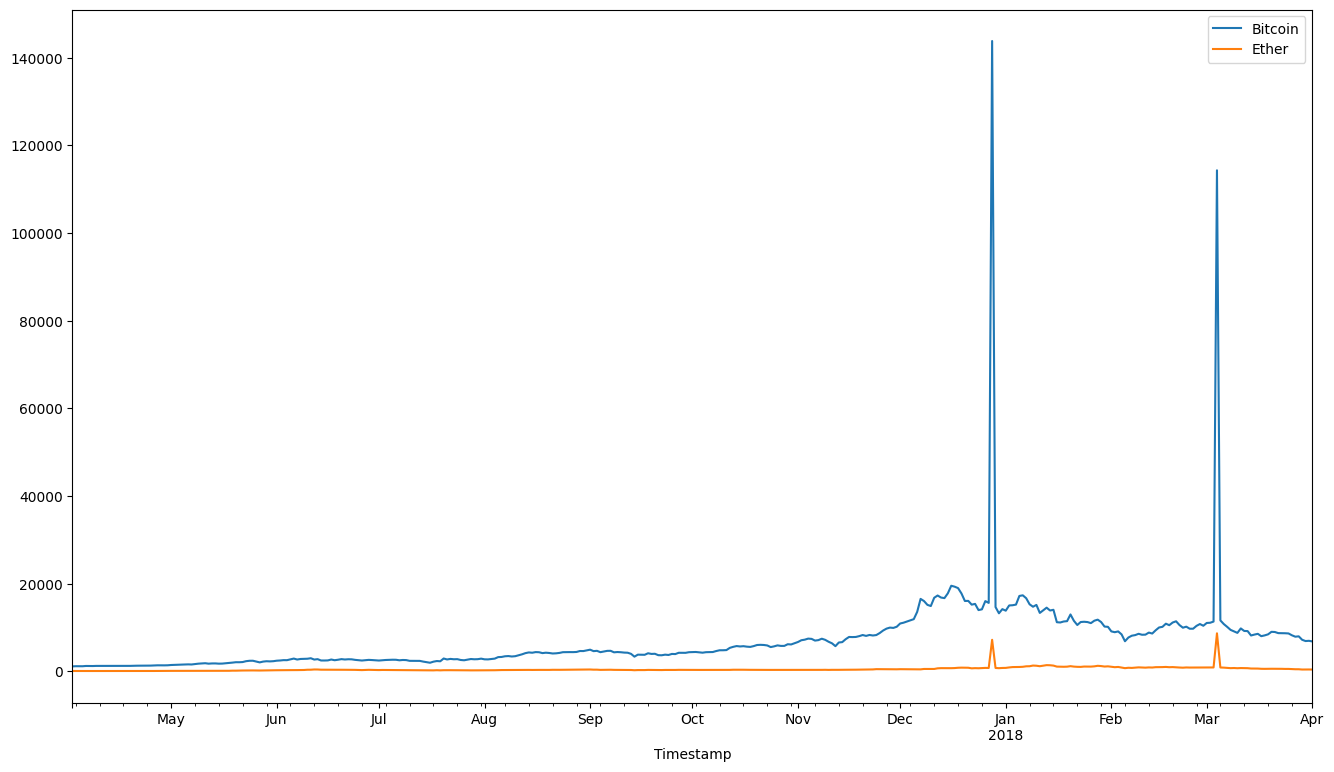

In [21]:
#Let's take a look now:


dataframe.plot(figsize=(16, 9))

We now need to fix the huge **spikes**. the first step is identifying them. How can do it? The simple answer is of course visually. They seem to be located in the las 10 days of Dec 2017 and first of March 2028:

<Axes: xlabel='Timestamp'>

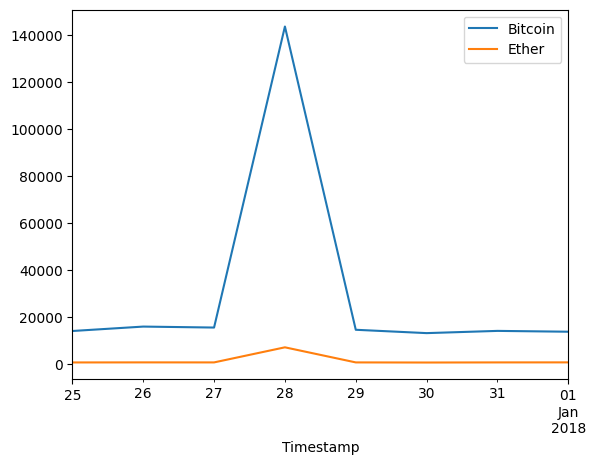

In [22]:
dataframe['2017-12-25':'2018-01-01'].plot()

<Axes: xlabel='Timestamp'>

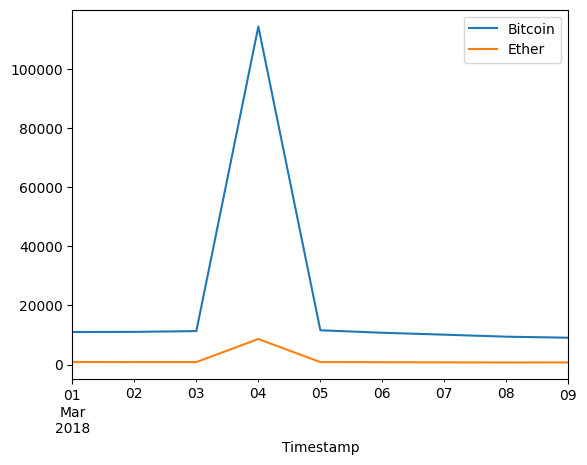

In [23]:

dataframe['2018-03-01': '2018-03-09'].plot()

Apparently, they´re located in 2017-12-28 and 2018-03-04

In [24]:
dataframe_cleaned = dataframe.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))


<Axes: xlabel='Timestamp'>

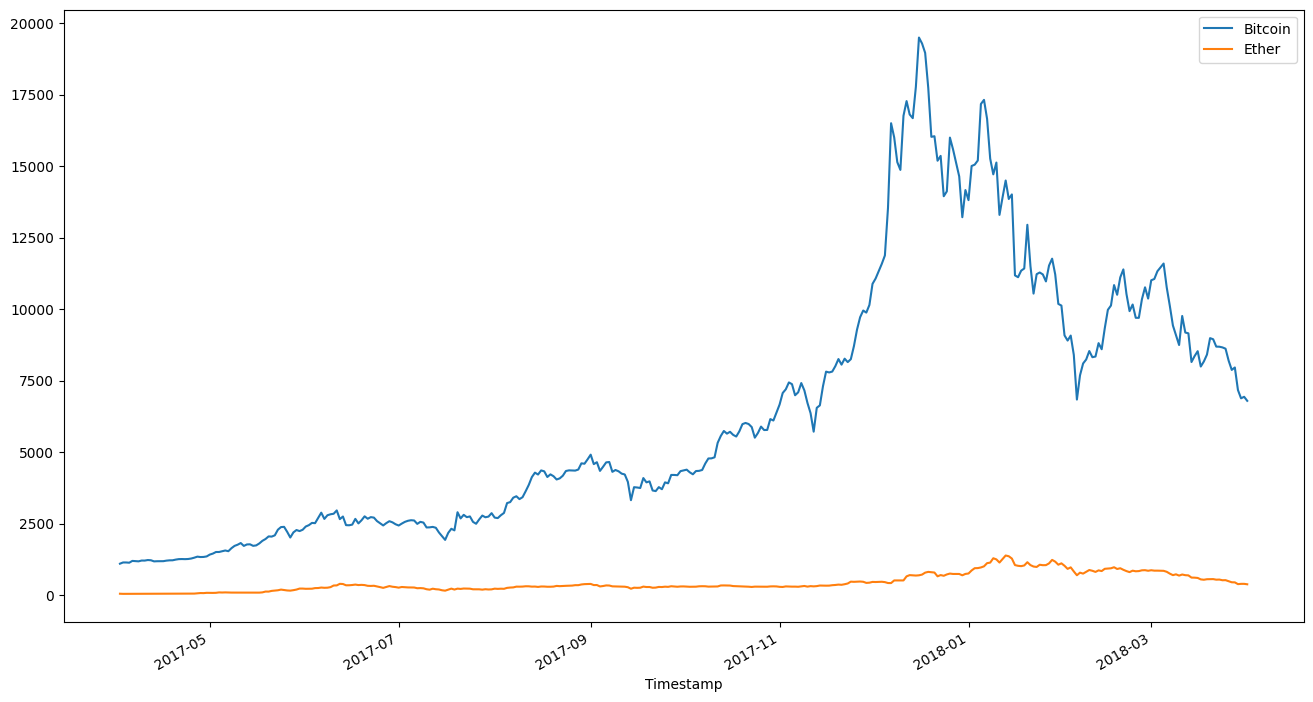

In [25]:
dataframe_cleaned.plot(figsize=(16, 9))